# Notebook: APED system

We first setup the notebook for plotting inline, in svg format

In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')


We then tune the figure parameters

In [2]:
plt.rcParams["figure.figsize"] = (12, 9)
plt.rcParams['image.cmap'] = "seismic" # palette for good contrast
plt.rc("font", size=16)

We tune the display of pandas dataframes:

In [3]:
import pandas as pd
pd.options.display.max_columns = 8


At last, the ResultReader from metadynamic package is loaded

In [4]:
from metadynamic import ResultReader, __version__
print(f"metadynamic version: {__version__}")


metadynamic version: 1.0.2


## Load result

Results from a simulation are loaded

In [5]:
res = ResultReader("APED.hdf5")
res.parameters

Param(name='APED', comment='Simple APED model', savedir='', logdir='testlog', loglevel='INFO', conc=3.0, ptot=20000, vol=6666.666666666667, init={'A': 10000, 'a': 10000}, rulemodel='aped.py', reactions=['A', 'H', 'E', 'a'], parameters={'kact_mono': 1.0, 'kepi_diff': 1.0, 'khyd_same': 1.0, 'kpola_diff': 0.1, 'kpola_same': 1.0}, tend=1000.0, tstep=5.0, sstep=50.0, rtlim=6000.0, maxsteps=100000, autoclean=True, dropmode='drop', gcperio=True, sleeptime=0.1, maxmem=90582, maxmem_percent=95, save=['a', 'aa', 'aaa', 'aaaa', 'A', 'Aa', 'aA', 'AA', 'a*', 'A*'], stat='aped-stat.json', statparam={'nbcomp': StatParam(prop='count', weight='count', method='+', full=False, collection='compounds'), 'poolsize': StatParam(prop='count', weight='count', method='+', full=True, collection='compounds'), 'nbreac': StatParam(prop='count', weight='count', method='+', full=False, collection='reactions'), 'poolreac': StatParam(prop='count', weight='count', method='+', full=True, collection='reactions'), 'len_mean

Informations from the run can be printed

In [6]:
nbthread = res.size
end = res.params.attrs["tend"]
print(res.printinfo)

----------------
Simple APED model
----------------
metadynamic version 1.0.2, ran on 28 threads on srvperso-polyphos
from [07.05.2020-16:22:59] to 16:43:47, 07/05/20
results saved in 'APED.hdf5'
----------------
#0: ending n°10 at runtime t=1156.44873046875s; Time is up -> t=1000.0000371787414
#1: ending n°10 at runtime t=1156.8402099609375s; Time is up -> t=1000.0001268631224
#2: ending n°10 at runtime t=1248.035888671875s; Time is up -> t=1000.0000067094029
#3: ending n°10 at runtime t=1207.2979736328125s; Time is up -> t=1000.0000205138182
#4: ending n°10 at runtime t=1193.865478515625s; Time is up -> t=1000.000033471578
#5: ending n°10 at runtime t=1171.0555419921875s; Time is up -> t=1000.0000387686962
#6: ending n°10 at runtime t=1138.5628662109375s; Time is up -> t=1000.0000927956401
#7: ending n°10 at runtime t=1110.304931640625s; Time is up -> t=1000.0000059714436
#8: ending n°10 at runtime t=1186.95947265625s; Time is up -> t=1000.00011779632
#9: ending n°10 at runtime t=118

## Data tables

A data summary can be obtained:

In [7]:
res.table()

,0,1,2,3,...,197,198,199,200
thread,13.500000,13.500000,13.500000,13.500000,...,1.350000e+01,1.350000e+01,1.350000e+01,1.350000e+01
ptime,0.062327,9.632211,20.142990,30.693216,...,1.159305e+03,1.163905e+03,1.168750e+03,1.173568e+03
memuse,143.893417,144.038498,144.086914,144.129883,...,1.446843e+02,1.446908e+02,1.447094e+02,1.447218e+02
step,0.000000,1.000000,2.000000,3.000000,...,1.970000e+02,1.980000e+02,1.990000e+02,2.000000e+02
dstep,0.000000,74388.039062,143442.750000,212747.640625,...,1.671940e+07,1.680704e+07,1.689474e+07,1.698237e+07
time,0.000000,5.000053,10.000070,15.000090,...,9.850000e+02,9.900001e+02,9.950000e+02,1.000000e+03
a,1.500000,0.334564,0.336621,0.336188,...,3.765375e-01,3.758732e-01,3.739553e-01,3.759857e-01
aa,0.000000,0.193457,0.190923,0.190479,...,2.237893e-01,2.235589e-01,2.238964e-01,2.236554e-01
aaa,0.000000,0.045386,0.044416,0.044475,...,5.785714e-02,5.798036e-02,5.809286e-02,5.813571e-02
aaaa,0.000000,0.007296,0.007623,0.007055,...,1.016786e-02,1.001786e-02,9.948215e-03,9.996428e-03


In [8]:
## Chemical reaction networks

We can check the CRN before bifurcation...

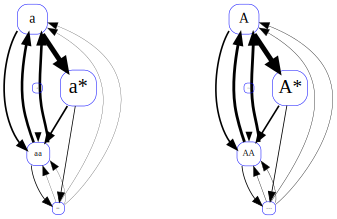

In [9]:
res.getsnap(3,0)

... and after bifurcation

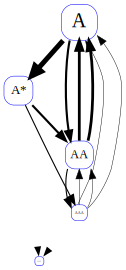

In [10]:
res.getsnap(3,-1)

## Results: plotting

We can plot time evolution of compounds (per thread and average behavior)

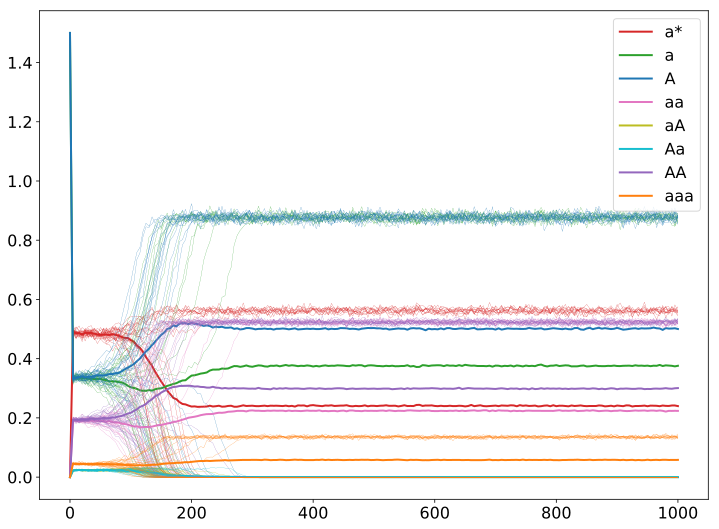

In [11]:
complist = ["a*", "a", "A", "aa", "aA", "Aa", "AA", "aaa"]
colorlist = ["tab:red", "tab:green", "tab:blue", "tab:pink", "tab:olive", "tab:cyan", "tab:purple", "tab:orange", "tab:brown", "tab:gray"]

for name, color in zip(complist, colorlist):
    plt.plot(*res.x_y_proc(name), linewidth=0.2, color=color)
    plt.plot(*res.x_y(name), linewidth=2, color=color, label=name)
    

plt.legend();

